/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


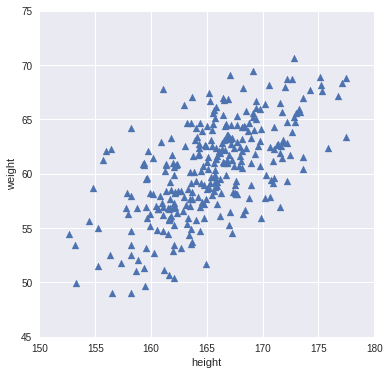

In [1]:
# 模擬データを作成する　x軸:体重, y軸:身長
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)  # 乱数のシードを固定

# 2次元の正規分布で模擬データ300人分を作成
mean = [165, 60]  # 身長、体重の平均値
cov = [[15, 20], [20, 10]]  # 分散共分散行列
X = np.random.multivariate_normal(mean, cov, 300)  # 2次元データ生成

# グラフを描画
plt.figure(figsize=(6, 6))
plt.scatter(X.T[0], X.T[1], marker='^')
plt.xlim(150, 180)
plt.ylim(45, 75)
plt.xlabel("height")
plt.ylabel("weight")
plt.show()


In [0]:
# 主成分分析を実施
from sklearn import cross_validation, preprocessing, decomposition

# データの正規化
# https://7264-843222-gh.circle-artifacts.com/0/home/ubuntu/scikit-learn/doc/_build/html/stable/auto_examples/preprocessing/plot_scaling_importance.html
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# 主成分分析実施
pca = decomposition.PCA()
pca.fit(X_std)  # PCAの計算
X_pca = pca.transform(X_std)  # PCAをX_stdに実施


In [165]:
# 主成分分析の結果を見る
print("主成分の分散説明率")
print(pca.explained_variance_ratio_)

print("固有ベクトル")
print(pca.components_)


主成分の分散説明率
[0.81346872 0.18653128]
固有ベクトル
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


<function matplotlib.pyplot.show>

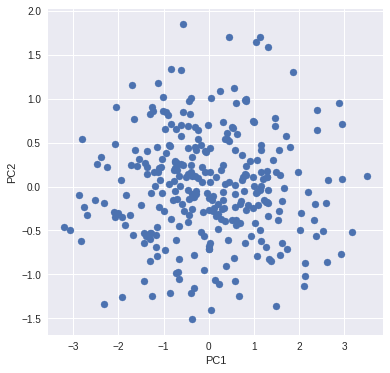

In [166]:
# 結果をプロットする
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show


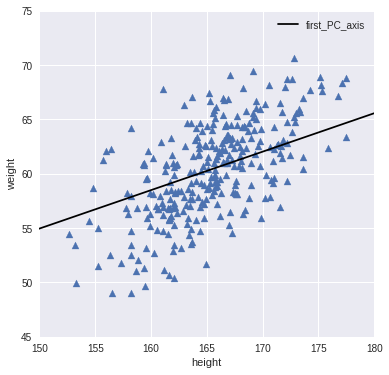

In [3]:
# 元のグラフに第1主成分の軸をプロットする

# 第1主成分の軸を描画するために軸上の2点が欲しい
# 正規化操作分を戻した固有ベクトルに平均値に足す（引く）
pca_point1 = sc.mean_ - sc.inverse_transform(pca.components_)[0]
pca_point2 = sc.mean_ + sc.inverse_transform(pca.components_)[0]
pca_point = np.c_[pca_point1, pca_point2]  # 点を列方向に足す

# データを描画
plt.figure(figsize=(6, 6))
plt.scatter(X.T[0], X.T[1], marker='^')
plt.plot(pca_point[0], pca_point[1], color='black',
         label='first_PC_axis')
plt.xlim(150, 180)
plt.ylim(45, 75)
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()


In [171]:
# 任意のデータをPCAする場合

data = (160, 50)
data_std = sc.transform([data])  # 正規化
data_pca = pca.transform(data_std)  # PCA実施
print(data_pca)


[[ 2.48793062 -0.88428776]]
